In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as ply
import seaborn as sns
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##### Q1 	Plot the data, find the outliers and find out  μ,σ,σ^2

In [2]:
q1=pd.read_excel('Set1_q1.xlsx')
q1

,Name of company,Measure X
0,Allied Signal,0.2423
1,Bankers Trust,0.2553
2,General Mills,0.2541
3,ITT Industries,0.2414
4,J.P.Morgan & Co.,0.2962
5,Lehman Brothers,0.2825
6,Marriott,0.2581
7,MCI,0.2439
8,Merrill Lynch,0.4026
9,Microsoft,0.3295


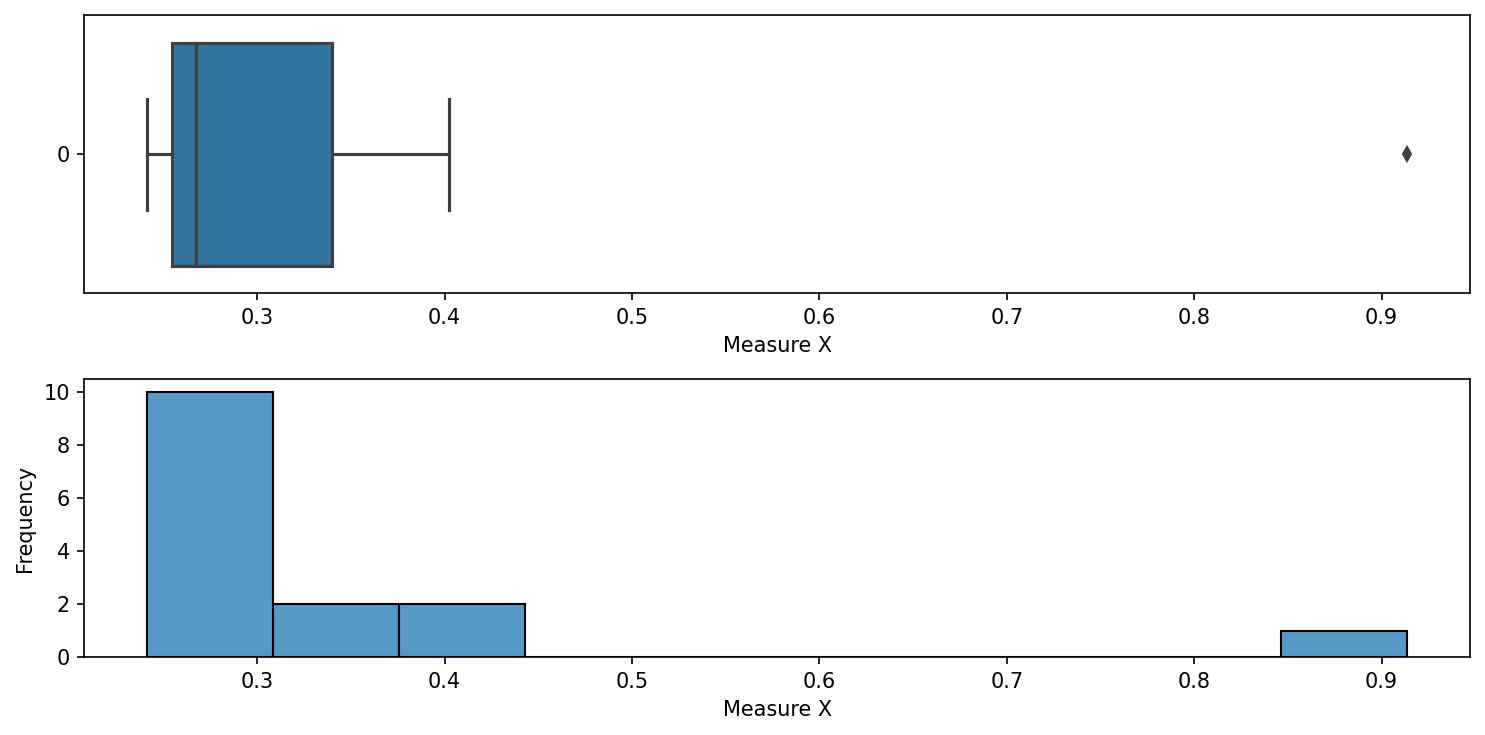

In [3]:
# First we will plot the Measure X
plt.rcParams['figure.dpi']=150
plt.rcParams['figure.figsize']=[10,5]
plt.subplot(2,1,1)
sns.boxplot(q1['Measure X'],orient='h')
plt.xlabel('Measure X')

plt.subplot(2,1,2)
sns.histplot(q1['Measure X'])
plt.ylabel('Frequency')
plt.tight_layout()

####
- From histogram and boxplot we can see one outlier above upper extreme in this data set.

In [4]:
# Finding Mean μ.
Mean=q1['Measure X'].mean()
Mean

0.3327133333333333

In [5]:
St_Dev = q1['Measure X'].std()
St_Dev

0.16945400921222029

In [6]:
Var = q1['Measure X'].var()
Var

0.028714661238095233

In [7]:
# We can use pandas filtering to find the outlier record.
Outlier = q1[q1['Measure X']>0.9]
Outlier
# from boxplot we can see that the outlier is greater than 0.9

,Name of company,Measure X
10,Morgan Stanley,0.9136


##### set2 Q1 What is the probability that the service manager cannot meet his commitment?

In [8]:
1-st.norm.cdf(50,loc=45,scale=8)

0.26598552904870054

#### set 2 Q2 The current age (in years) of 400 clerical employees at an insurance claims processing center is normally distributed with mean  = 38 and Standard deviation  =6. For each statement below

##### A.	More employees at the processing center are older than 44 than between 38 and 44.

In [9]:
# Employee whose age is more than 44 so we have to calculate area under the curve and the right 
# side of the probability

In [10]:
z=(44-38)/6
z

1.0

In [11]:
P = 1-st.norm.cdf(1)
P

0.15865525393145707

In [12]:
# Calculating the probability value of having the age between 38 and 44 using the  z-score is
st.norm.cdf(1)-st.norm.cdf(0)

0.3413447460685429

##### B.	A training program for employees under the age of 30 at the center would be expected to attract about 36 employees.

In [13]:
# To find the employee age under 30 we need to find area under the curve and the left side of the 
# probability
z=(30-38)/6
z

-1.3333333333333333

In [14]:
st.norm.cdf(-1.33)

0.09175913565028077

In [15]:
# To determine the number of workers we multiply the above percentage by 400
0.0918*400

36.720000000000006

##### Set 2 Q4	Let X ~ N(100, 202). Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99. 

In [16]:
st.norm.ppf(0.005)

-2.575829303548901

In [17]:
st.norm.ppf(0.0995)

-1.2844058132054617

In [18]:
a= -(20*2.576)+100
a

48.48

In [19]:
b=20*(2.576) +100 
b

151.52

### set 2 Q5 5.	Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 32) and Profit2 ~ N(7, 42) respectively. Both the profits are in Million dollars. Answer the following questions about the total profit of the company in Rupees. Assume that 1 dollar = Rs. 45
- A.	Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
- B.	Specify the 5th percentile of profit (in Rupees) for the company
- C.	Which of the two divisions has a larger probability of making a loss in a given year?

In [20]:
#mean profitfrom two different divisions of a company = Mean1 + Mean2
Mean = 5+7
print('Mean profit is Rs', Mean*45,'Million')

Mean profit is Rs 540 Million


In [21]:
# Variance of profit from different divisions of a company =SD^2 =SD62 +sd262
SD = np.sqrt((9)+(16))
print('standard deviation is Rs', SD*45, 'Million')

standard deviation is Rs 225.0 Million


In [22]:
# A. Specify Aa Rupee range (centred on the mean) such that it contain 95% probability for the annualprofit of the company.
print('Range is Rs',(st.norm.interval(0.95,540,225)),'in Millions')

Range is Rs (99.00810347848784, 980.9918965215122) in Millions


In [23]:
# B. specify the 5th percentile of profite ( in Rupees) for the company
# To compute 5th percentile , we use the formula X=µ + Zσ;whrein from z table, 5 percentile = -1.645
x=540+(-1.645)*(225)
print('5th percentile of profit (in Million Rupees) is',np.round(x,))

5th percentile of profit (in Million Rupees) is 170.0


In [24]:
# C. Which of the two divisions has a larger probbility of making a loss in a given year?

In [25]:
#proabbailty of division 1 making a loss p(x<0)
st.norm.cdf(0,5,3)

0.0477903522728147

In [26]:
#proabbailty of division 2 making a loss p(x<0)
st.norm.cdf(0,7,4)

0.040059156863817086

In [27]:
# Hence 2nd division has more chances of profit

### Set 4 Q3 3.	Auditors at a small community bank randomly sample 100 withdrawal transactions made during the week at an ATM machine located near the bank’s main branch. Over the past 2 years, the average withdrawal amount has been 50 dollars with a standard deviation of 40 dollars. Since audit investigations are typically expensive, the auditors decide to not initiate further investigations if the mean transaction amount of the sample is between 45 dollars and 55 dollars. What is the probability that in any given week, there will be an investigation?

In [28]:
# For No investigation P(45<X<55)
# For Investigation 1-P(45<X<55)

# find z-scores at x=45; z=(s_mean-P_mean)/(p_SD/sqrt(n))
z=(45-50)/(40/100**0.5)
z

-1.25

In [29]:
# find z-scores at x=55; z=(s_mean-P_mean)/(p_SD/sqrt(n))
z=(55-50)/(40/100**0.5)
z

1.25

In [30]:
# For No investigation P(45<X<55) using z_scores = P(X<50)-P(X<45)
st.norm.cdf(1.25)-st.norm.cdf(-1.25)

0.7887004526662893

In [31]:
# For No investigation P(45<X<55) using z_scores = P(X<50)-P(X<45)
st.norm.cdf(1.25)-st.norm.cdf(-1.25)

0.7887004526662893

In [32]:
# For Investigation 1-P(45<X<55)
1-0.7887

0.21130000000000004